In [1]:
import sys
import matplotlib.colors as clr
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from astropy.io import fits
from GCRCatalogs.helpers.tract_catalogs import tract_filter, sample_filter
from GCR import GCRQuery
os.chdir('gcr-catalogs-master/')
import GCRCatalogs
print('GCRCatalogs =', GCRCatalogs.__version__, '|' ,'GCR =', GCRCatalogs.GCR.__version__)
GCRCatalogs.get_available_catalog_names()
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

GCRCatalogs = 1.3.5 | GCR = 0.9.2


['buzzard',
 'buzzard_high-res',
 'cosmoDC2_v1.1.4_image',
 'cosmoDC2_v1.1.4_redmagic_v0.8.1_highdens',
 'cosmoDC2_v1.1.4_redmagic_v0.8.1_highlum',
 'cosmoDC2_v1.1.4_redmapper_v0.8.1',
 'cosmoDC2_v1.1.4_small',
 'dc2_object_run1.2i',
 'dc2_object_run1.2i_all_columns',
 'dc2_object_run1.2i_tract4850',
 'dc2_object_run1.2i_with_photoz',
 'dc2_object_run1.2p',
 'dc2_object_run1.2p_all_columns',
 'dc2_object_run1.2p_tract4850',
 'dc2_object_run2.2i_dr2_wfd',
 'dc2_object_run2.2i_dr2_wfd_with_addons',
 'dc2_object_run2.2i_dr3a',
 'dc2_object_run2.2i_dr3a_with_metacal',
 'dc2_object_run2.2i_dr3a_with_photoz',
 'dc2_object_run2.2i_dr6',
 'dc2_object_run2.2i_dr6_with_addons',
 'dc2_redmagic_run2.2i_dr6_wfd_v0.8.1_highdens',
 'dc2_redmagic_run2.2i_dr6_wfd_v0.8.1_highlum',
 'dc2_redmapper_run2.2i_dr6_wfd_v0.8.1',
 'dc2_run2.2i_truth_galaxy_summary',
 'dc2_run2.2i_truth_sn_summary',
 'dc2_run2.2i_truth_sn_variability',
 'dc2_run2.2i_truth_star_summary',
 'dc2_run2.2i_truth_star_variability',
 'dc

In [45]:
sorted(q for q in cat.list_all_quantities() if q.startswith('tra'))

['tract', 'tract_truth']

In [141]:
cat = GCRCatalogs.load_catalog('dc2_object_run2.2i_dr6_with_addons')

#Apply cuts
cuts = [
    GCRQuery('ra > 51'),
    GCRQuery('ra < 56'),
    GCRQuery('dec > -42'),
    GCRQuery('dec < -38'),
    #GCRQuery('redshift_truth > 0.25'),
    #GCRQuery('redshift_truth < 0.27'),
    GCRQuery('truth_type == 1'),   # select galaxy
    GCRQuery('is_good_match == True'),
    GCRQuery('is_nearest_neighbor == True'),
    GCRQuery((np.isfinite, 'mag_g_cModel')), # Select objects that have g-band magnitudes
    GCRQuery((np.isfinite, 'mag_r_cModel')), # Select objects that have r-band magnitudes
    GCRQuery((np.isfinite, 'mag_i_cModel')), # Select objects that have i-band magnitudes
    GCRQuery((np.isfinite, 'mag_g')), 
    GCRQuery((np.isfinite, 'mag_r')), 
    GCRQuery((np.isfinite, 'mag_i')), 
    #GCRQuery('clean'), # The source has no flagged pixels (interpolated, saturated, edge, clipped...) 
                       # and was not skipped by the deblender
]

data = cat.get_quantities(['objectId', 'id_truth','redshift_truth', 'ra', 'dec',
                          'mag_g_cModel','mag_r_cModel','mag_i_cModel',
                           'mag_g', 'mag_r', 'mag_i','photoz_mean','photoz_mode','tract','tract_truth'],
                          filters=cuts,native_filters=[tract_filter([3443, 3442, 3257,3258,3444,3259,
                                                                     3256,3634,3633,3632,3631,3077,3076,3075])])

/global/cscratch1/sd/zg64/Rubin-Roman-Redmagic/gcr-catalogs-master/GCRCatalogs/dc2_dm_catalog.py:43: RuntimeWarning: invalid value encountered in log10
  return -2.5 * np.log10(flux) + AB_mag_zp_wrt_nanoJansky
/global/cscratch1/sd/zg64/Rubin-Roman-Redmagic/gcr-catalogs-master/GCRCatalogs/dc2_dm_catalog.py:43: RuntimeWarning: divide by zero encountered in log10
  return -2.5 * np.log10(flux) + AB_mag_zp_wrt_nanoJansky


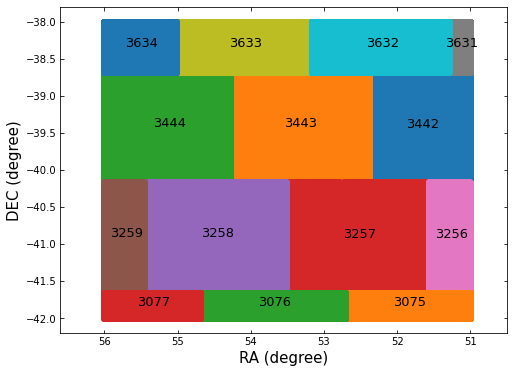

In [143]:
ms = [data['tract']==3442,data['tract']==3443,data['tract']==3444,data['tract']==3257,data['tract']==3258,
     data['tract']==3259,data['tract']==3256,data['tract']==3631,data['tract']==3633,data['tract']==3632,
      data['tract']==3634,data['tract']==3075,data['tract']==3076,data['tract']==3077]
plt.figure(figsize = (8,6))
for m in ms:
    r = data['ra'][m]
    d = data['dec'][m]
    plt.scatter(r,d)
    plt.text(np.mean(r)+0.2,np.mean(d),(str(data['tract'][m][0])),fontsize = 13)
    plt.xlim(56.6,50.5);
plt.xlabel('RA (degree)',fontsize = 15)
plt.ylabel('DEC (degree)',fontsize = 15)
plt.savefig('../plots/DC2_overlap_tract.png')

In [309]:
dc2_redmagic_cat = GCRCatalogs.load_catalog('dc2_redmagic_run2.2i_dr6_wfd_v0.8.1_highdens')
dc2_redmagic_cat.list_all_quantities()

['zspec',
 'redshift_err',
 'mag_i_lsst',
 'id',
 'mag_y_lsst',
 'magerr_g_lsst',
 'refmag_z_lsst',
 'redshift',
 'zredmagic_samp_1',
 'mag_g_lsst',
 'magerr_y_lsst',
 'dec',
 'magerr_z_lsst',
 'chisq',
 'magerr_i_lsst',
 'z_lum',
 'zredmagic_samp_2',
 'mag_z_lsst',
 'magerr_r_lsst',
 'mag_r_lsst',
 'zredmagic_samp_0',
 'zredmagic_samp_3',
 'ra']

In [286]:
cuts = [
    GCRQuery('ra > 51'),
    GCRQuery('ra < 56'),
    GCRQuery('dec > -42'),
    GCRQuery('dec < -38'),
]

redmagic_data = dc2_redmagic_cat.get_quantities(['id', 'ra','dec', 'zspec', 'redshift','zredmagic_samp_0','zredmagic_samp_1','zredmagic_samp_2','zredmagic_samp_3'
                          ,'mag_g_lsst','mag_r_lsst','mag_i_lsst','redshift_err'],
                          filters=cuts)

In [287]:
idx = list()
red_idx = list()
for i,ids in tqdm(enumerate(redmagic_data['id'])):
    if ids in table_id:
        idx.append(np.where(table_id == ids)[0][0])
        red_idx.append(i)

25954it [05:07, 84.32it/s]


In [ ]:
table_id = np.array(data['objectId'])
table_g = data['mag_g_cModel'][np.array(idx)]
table_r = data['mag_r_cModel'][np.array(idx)]
table_i = data['mag_i_cModel'][np.array(idx)]

(17.195870105898294, 20.183605148645743)

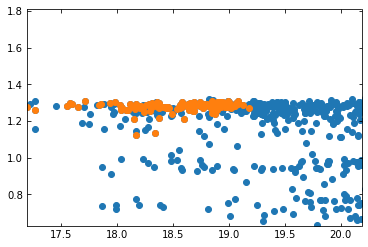

In [369]:
z_low = 0.26
z_high = 0.25
z_mask = (data['photoz_mode'][np.array(idx)] > z_high) & (data['photoz_mode'][np.array(idx)] < z_low)
z_m =  (data['photoz_mode'] > z_high) & (data['photoz_mode'] < z_low)


plt.scatter(data['mag_i_cModel'][z_m],data['mag_g_cModel'][z_m]-data['mag_r_cModel'][z_m])
plt.scatter(table_i[z_mask],table_g[z_mask]-table_r[z_mask])
plt.ylim((table_g[z_mask]-table_r[z_mask]).min()-0.5,(table_g[z_mask]-table_r[z_mask]).max()+0.5)
plt.xlim(table_i[z_mask].min(),table_i[z_mask].max()+1)

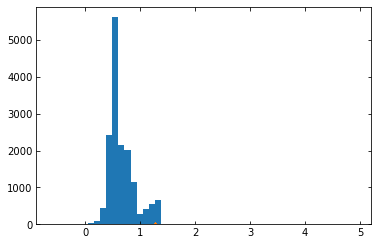

In [377]:
plt.hist(data['mag_g_cModel'][z_m]-data['mag_r_cModel'][z_m],bins = 50);
plt.hist(table_g[z_mask]-table_r[z_mask]);

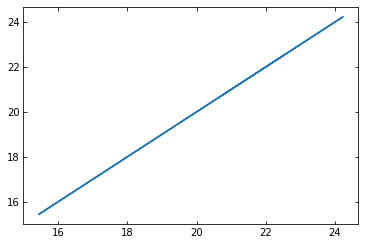

In [275]:
plt.plot(data['mag_r_cModel'][np.array(idx)],redmagic_data['mag_r_lsst'][np.array(red_idx)])